# ***Dataset Analysis & Pre-Processing***

**Author:** S. Giacomelli

**Year:** 2023

**Affiliation:** A.Casella Conservatory (student)

**Master Degree Thesis**: "*Vowel phonemes Analysis & Classification by means of OCON rectifiers Deep Learning Architectures*"

**Description:** Python scripts for HGCW Dataset analysis, features extraction and pre-pocessing

In [ ]:
# Numerical computations packages/modules
import numpy as np

# Graphic visualization modules
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Common Seed initialization
SEED = 42  # ... the answer to the ultimate question of Life, the Universe, and Everything... (cit.)

## **HGCW** (*Hillenbrand-Getty-Clark-Wheeler*) Dataset

Download link: ["Vowel Data" - Western Michigan University](https://homepages.wmich.edu/~hillenbr/voweldata.html) (*...no longer maintained*)

---

**References**

> 1. L.A. Getty, 1990 - [*Acoustic Characteristics of Vowels Produced by Men, Women and and Children*](https://scholarworks.wmich.edu/cgi/viewcontent.cgi?article=2061&context=masters_theses), Master Degree Thesis, Western Michigan University
>
> 2. J. Hillenbrand, R.T. Gayvert, 1993 - [*Vowel Classification Based on Fundamental Frequency and Formant Frequencies*](https://sci-hub.ru/https://doi.org/10.1044/jshr.3604.694), in Journal of Speech and Hearing Research, vol. 36, pp. 694 - 700
>
> 3. J. Hillenbrand, L.A. Getty, M.J. Clark, K. Wheeler, 1995 - [*Acoustic characteristics of American English vowels*](https://sci-hub.ru/https://doi.org/10.1121/1.411872), in The Journal of the Acoustical Society of America, 97, pp. 3099 - 3111
>

---

**Filenames Structure**

|   **1**   | **2-3**                   | **4-5**          | **Example** |
|:---------:|---------------------------|------------------|-------------|
| m = man   | nn = speaker n° (50 each) | xx = vocal label | m10ae       |
| b = boy   | nn = speaker n° (29 each) | xx = vocal label | b11ei       |
| w = woman | nn = speaker n° (50 each) | xx = vocal label | w49ih       |
| g = girl  | nn = speaker n° (21 each) | xx = vocal label | g20oo       |

---

**Audio files features:**
- Duration: 1 sec.
- Sample Rate: 16 KHz
- Resolution depth: 16 bit
- File extension: .wav (*wave audio*)

---

**Analysis File Structure**

    **"Formant_Fine_Sampling.csv" Columns**
    0) filename
    1) duration (in ms)
    2) "f0" (fundamental frequency) at steady state
    3) "F1" (1st formant frequency) at steady state
    4) "F2" (2nd formant frequency) at steady state
    5) "F3" (3rd formant frequency) at steady state
    6) "F1" at 10% of vowel utterance duration
    7) "F2" at 10% of vowel utterance duration
    8) "F3" at 10% of vowel utterance duration
    18) "F1" at 50% of vowel utterance duration
    19) "F2" at 50% of vowel utterance duration
    20) "F3" at 50% of vowel utterance duration
    27) "F1" at 80% of vowel utterance duration
    28) "F2" at 80% of vowel utterance duration
    29) "F3" at 80% of vowel utterance duration

**IMP.:** *0s feature values = formant analysis errors*

...for more information (steady state times etc.) see "*Time_Measurements.dat*" and "*Descriptive_Statistics.dat*".

In [ ]:
# Database (.DAT file) Features Reading (converted to NumPy array)
formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)

# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
colors = ['red', 'saddlebrown', 'darkorange', 'darkgoldenrod', 'gold', 'darkkhaki', 'olive', 'darkgreen', 'steelblue', 'fuchsia', 'indigo', 'black']
speakers = ['m', 'b', 'w', 'g']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")

Dataset: 1668 samples (for 12 labels) & 4 features each


### **Filtering Functions**

- Speaker-based dataset filtering
- Vowel-based dataset filtering
- Null elements dataset filtering

In [ ]:
# Speaker filter
def speaker_filter(data_array, filenames_array, speaker: str = 'm'):
    """
    Return a list of indices and a filtered data array for a defined speaker string
    """
    assert len(data_array) == len(filenames_array)
    indices = []

    for i in range(len(filenames_array)):  # For each filename...
        if filenames_array[i].lower()[0] == speaker:
            indices.append(i)  # If filename contains speaker sub-string, append actual index to indices array

    return data_array[indices], indices
# ------------------------------------------------------------------------------------------------------------

# Vowels filter
def vowel_filter(data_array, filenames_array, vowel: str = 'ae'):
    """
    Return a list of indices and a filtered data array for a defined vowel string
    """
    assert len(data_array) == len(filenames_array)
    indices = []

    for i in range(len(filenames_array)):  # For each filename...
        if vowel in filenames_array[i].lower()[3: ]:
            indices.append(i)  # If filename contains vowel sub-string, append actual index to indices array

    return data_array[indices], indices
# ------------------------------------------------------------------------------------------------------------

# Null elements filter
def null_filter(data_array, filenames_array):
    """
    Return a list of "null-elements" indices and a filtered data and labels array, without null elements
    """
    assert len(data_array) == len(filenames_array)
    null_indices = []

    for i in range(len(filenames_array)):  # For each filename...
        for j in range(data_array.shape[1]):  # For each feature column...
            if (data_array[i, j] == 0):  # If any formant frequency is null...
                null_indices.append(i)  # Append actual index to indices array

    filtered_filenames = np.delete(filenames_array, null_indices, axis=0)  # Create output deleting null indices from filenames array
    filtered_data = np.delete(data_array, null_indices, axis=0)  # Create output deleting null indices from data array

    return filtered_data, filtered_filenames, null_indices

In [ ]:
# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(formant_analysis_data, formant_analysis_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

# Outputs initialization
x_data_raw_np = np.zeros((len(nonnull_data), 4), dtype=float)  # Same Database n° of elements, 4 float features (columns)
y_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer label single column array

# Subgroups extraction & analysis
end_idx = [0]  # Indices list initialization (0 and size values comprised)
vow_size = []  # Vowel groups size list initialization

for vowel_idx, vowel in enumerate(vowels):
    vow_data, _ = vowel_filter(nonnull_data, nonnull_filenames, vowel=vowel)  # Vowel sub-set extraction
    end_idx.append(end_idx[vowel_idx] + len(vow_data))  # Actual sub-group End-Index appending
    vow_size.append(len(vow_data))  # Actual sub-group length appending
    print(f'Vowel "{vowel}" sub-set : {len(vow_data)} samples')

    start_idx = end_idx[vowel_idx]  # Previous sub-set end-index
    print('1st  element Idx   :', start_idx)
    stop_idx = end_idx[vowel_idx] + len(vow_data)  # Actual stop index = previous End + actual Size
    print('Last element Idx   :', stop_idx - 1)
    x_data_raw_np[start_idx: stop_idx, :] = vow_data[:, :]   # Output data sub-set ordered writing (Fundamental, 1st, 2nd & 3rd formants only)

    vow_labels = np.full((len(vow_data), 1), vowel_idx, dtype=int)  # Actual integer labels array creation
    print(f'Vowel LABEL        : {vowel} - {vowel_idx}')
    y_labels_raw_np[start_idx: stop_idx, :] = vow_labels  # Output labels sub-set ordered writing

    print('--------------------------------')

# Different labels counter
diff_labels = len(np.unique(y_labels_raw_np))

print()
print(f'--> RAW DATASET shape: {x_data_raw_np.shape}, w. {diff_labels} Labels')

NON NULL Dataset: 1617 samples (for 12 labels) & 4 features each
--------------------------------------------------------------------

Vowel "ae" sub-set : 134 samples
1st  element Idx   : 0
Last element Idx   : 133
Vowel LABEL        : ae - 0
--------------------------------
Vowel "ah" sub-set : 136 samples
1st  element Idx   : 134
Last element Idx   : 269
Vowel LABEL        : ah - 1
--------------------------------
Vowel "aw" sub-set : 135 samples
1st  element Idx   : 270
Last element Idx   : 404
Vowel LABEL        : aw - 2
--------------------------------
Vowel "eh" sub-set : 139 samples
1st  element Idx   : 405
Last element Idx   : 543
Vowel LABEL        : eh - 3
--------------------------------
Vowel "er" sub-set : 124 samples
1st  element Idx   : 544
Last element Idx   : 667
Vowel LABEL        : er - 4
--------------------------------
Vowel "ei" sub-set : 132 samples
1st  element Idx   : 668
Last element Idx   : 799
Vowel LABEL        : ei - 5
--------------------------------
Vow

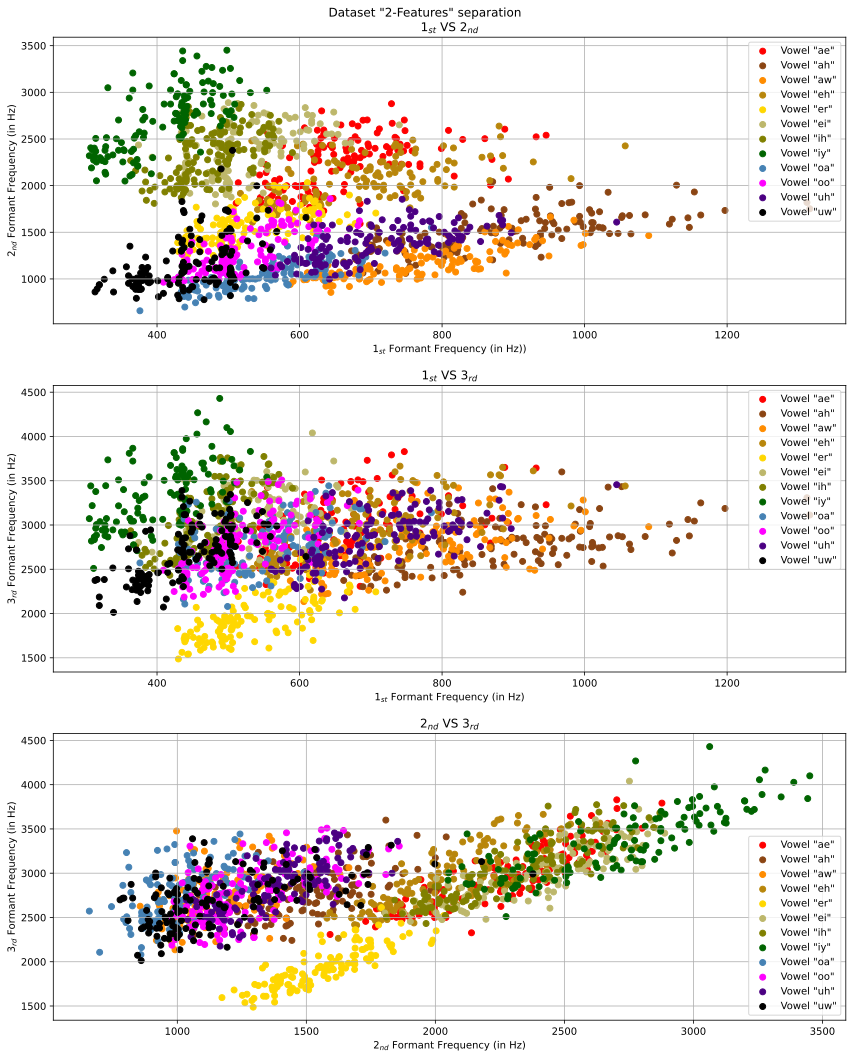

In [ ]:
# Raw Dataset Plot
plt.figure(figsize=(12, 15))
plt.suptitle('Dataset "2-Features" separation')

for index, vowel in enumerate(vowels):

    first_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 1]
    second_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 2]
    third_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 3]

    plt.subplot(3, 1, 1)
    plt.title('$1_{st}$ VS $2_{nd}$')
    plt.scatter(first_coords, second_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency (in Hz))')
    plt.ylabel('$2_{nd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.title('$1_{st}$ VS $3_{rd}$')
    plt.scatter(first_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency (in Hz)')
    plt.ylabel('$3_{rd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.title('$2_{nd}$ VS $3_{rd}$')
    plt.scatter(second_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$2_{nd}$ Formant Frequency (in Hz)')
    plt.ylabel('$3_{rd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.savefig("raw_dataset_plot")
plt.show()

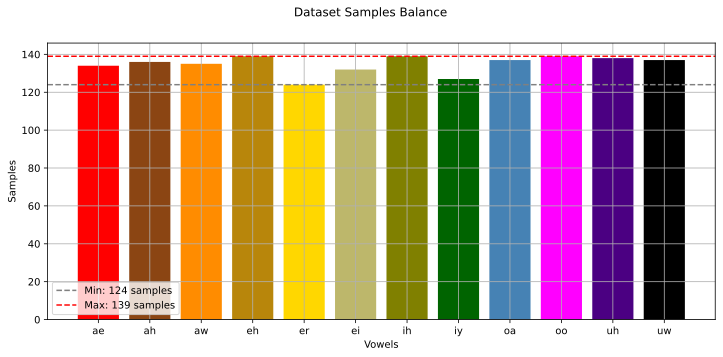

In [ ]:
# Class Occurences Plot (Sample Balancing Analysis)
plt.figure(figsize=(12, 5))
plt.suptitle("Dataset Samples Balance")

for i in range(len(colors)):
    plt.bar(i, vow_size[i], color=colors[i])
    plt.xlabel('Vowels')
    plt.ylabel('Samples')

plt.xticks(ticks=[n for n in range(12)], labels=vowels)

plt.axhline(np.min(vow_size), color='grey', linestyle='--', label=f'Min: {np.min(vow_size)} samples')
plt.axhline(np.max(vow_size), color='red', linestyle='--', label=f'Max: {np.max(vow_size)} samples')
plt.legend(loc='best')
plt.grid()

plt.savefig('dataset_class_occurences')
plt.show()

### **"Formant to Fundamental" Normalization**

Formant frequency ratio

\begin{align}
    {formant_{ratio}}_{(i)} = \frac{freq_{formant_{(i)}}}{freq_{fund}}
\end{align}

In [ ]:
# Fundamental Frequency (ratio) Normalization
x_data_fund_norm = np.zeros(x_data_raw_np.shape)  # Output initialization

for i in range(x_data_raw_np.shape[1]):  # For each feature...
    if i >= 1: # For each formant column...
        x_data_fund_norm[:, i] = x_data_raw_np[:, i] / x_data_raw_np[:, 0]  # i-Formant value / i-Fundamental value
    else:  # Exception for Fundamental freq column
        x_data_fund_norm[:, i] = x_data_raw_np[:, i]

print(f"'Fundamental Normalized' Dataset: {x_data_fund_norm.shape[0]} elements (w. {diff_labels} labels) & {x_data_fund_norm.shape[1]} features each")

'Fundamental Normalized' Dataset: 1617 elements (w. 12 labels) & 4 features each


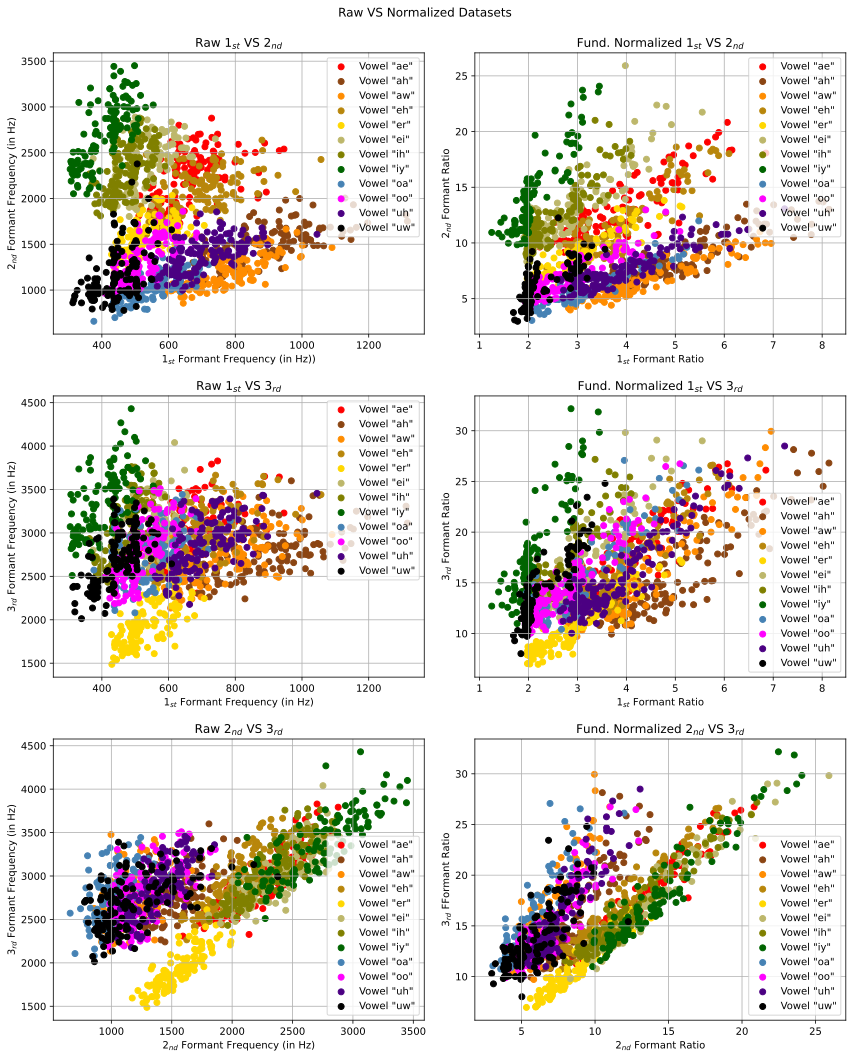

In [ ]:
# Fundamental Normalized dataset Plot
plt.figure(figsize=(12, 15))
plt.suptitle('Raw VS Normalized Datasets\n')

for index, vowel in enumerate(vowels):

    first_coords = x_data_fund_norm[end_idx[index]: end_idx[index + 1], 1]
    second_coords = x_data_fund_norm[end_idx[index]: end_idx[index + 1], 2]
    third_coords = x_data_fund_norm[end_idx[index]: end_idx[index + 1], 3]

    plt.subplot(3, 2, 2)
    plt.title('Fund. Normalized $1_{st}$ VS $2_{nd}$')
    plt.scatter(first_coords, second_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Ratio')
    plt.ylabel('$2_{nd}$ Formant Ratio')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 2, 4)
    plt.title('Fund. Normalized $1_{st}$ VS $3_{rd}$')
    plt.scatter(first_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Ratio')
    plt.ylabel('$3_{rd}$ Formant Ratio')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 2, 6)
    plt.title('Fund. Normalized $2_{nd}$ VS $3_{rd}$')
    plt.scatter(second_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$2_{nd}$ Formant Ratio')
    plt.ylabel('$3_{rd}$ FFormant Ratio')
    plt.legend(loc='best')
    plt.grid(True)

for index, vowel in enumerate(vowels):

    first_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 1]
    second_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 2]
    third_coords = x_data_raw_np[end_idx[index]: end_idx[index + 1], 3]

    plt.subplot(3, 2, 1)
    plt.title('Raw $1_{st}$ VS $2_{nd}$')
    plt.scatter(first_coords, second_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency (in Hz))')
    plt.ylabel('$2_{nd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 2, 3)
    plt.title('Raw $1_{st}$ VS $3_{rd}$')
    plt.scatter(first_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency (in Hz)')
    plt.ylabel('$3_{rd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 2, 5)
    plt.title('Raw $2_{nd}$ VS $3_{rd}$')
    plt.scatter(second_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$2_{nd}$ Formant Frequency (in Hz)')
    plt.ylabel('$3_{rd}$ Formant Frequency (in Hz)')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.savefig("raw_vs_fund_norm_datasets_plot")
plt.show()

### **Min-Max Scaling**

\begin{align}
    \hat{x} = \frac{x_i - \min{(x)}}{\max{(x)} - \min{(x)}}
\end{align}

and eventually

\begin{align}
    x^* = a + \hat{x}(b - a)
\end{align}

with $a$ & $b$ respectively, lower and upper bounds of the destination range.

**IMP.**: in this case Min-Max scaling is commonly applied to entire features space *(are measured on the same axis and represents samples of same spectral domain properties)*

In [ ]:
a = 0.  # Lower bound
b = 1.  # Upper bound
x_data_minmax = np.zeros((x_data_fund_norm.shape))
print(f'Fundamental Ratios  STATS:   Min. = {x_data_fund_norm[:, 1:].min()}    Max. = {x_data_fund_norm[:, 1:].max()}')

x_data_minmax[:, 1:] = a + ((x_data_fund_norm[:, 1:] - x_data_fund_norm[:, 1:].min()) / (x_data_fund_norm[:, 1:].max() - x_data_fund_norm[:, 1:].min())) * (b - a)
x_data_minmax[:, 0] = x_data_fund_norm[:, 0]  # Fundamental column exception

print(f'Min-Max Ratios      STATS:   Min. = {x_data_minmax[:, 1:].min()}                   Max. = {x_data_minmax[:, 1:].max()}')
print('--------------------------------------------------------------------')
print(f"'Fundamental & Min-Max Normalized' Dataset: {x_data_minmax.shape[0]} elements (w. {diff_labels} labels) & {x_data_minmax.shape[1]} features each")

Fundamental Ratios  STATS:   Min. = 1.2491467576791808    Max. = 32.16822429906542
Min-Max Ratios      STATS:   Min. = 0.0                   Max. = 1.0
--------------------------------------------------------------------
'Fundamental & Min-Max Normalized' Dataset: 1617 elements (w. 12 labels) & 4 features each


### **Statistical Analysis**

- Features **P**robability **M**ass **D**istribution (on the entire Dataset)
- Feaatures **P**robability **M**ass **D**istribution (for each class sub-set)

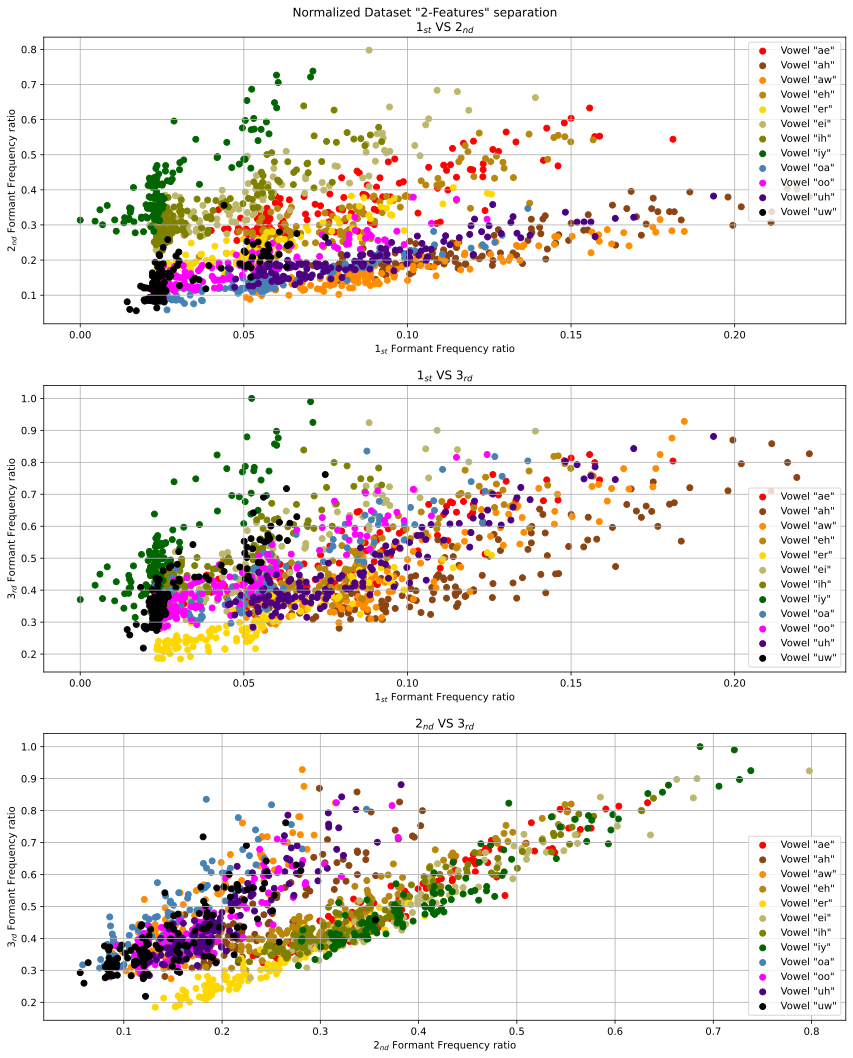

In [ ]:
# Dataset Plot
dataset = x_data_minmax # x_data_fund_norm

plt.figure(figsize=(12, 15))
plt.suptitle('Normalized Dataset "2-Features" separation')

for index, vowel in enumerate(vowels):

    first_coords = dataset[end_idx[index]: end_idx[index + 1], 1]
    second_coords = dataset[end_idx[index]: end_idx[index + 1], 2]
    third_coords = dataset[end_idx[index]: end_idx[index + 1], 3]

    plt.subplot(3, 1, 1)
    plt.title('$1_{st}$ VS $2_{nd}$')
    plt.scatter(first_coords, second_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency ratio')
    plt.ylabel('$2_{nd}$ Formant Frequency ratio')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.title('$1_{st}$ VS $3_{rd}$')
    plt.scatter(first_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$1_{st}$ Formant Frequency ratio')
    plt.ylabel('$3_{rd}$ Formant Frequency ratio')
    plt.legend(loc='best')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.title('$2_{nd}$ VS $3_{rd}$')
    plt.scatter(second_coords, third_coords, marker='o', color=colors[index], label=f'Vowel "{vowel}"')
    plt.xlabel('$2_{nd}$ Formant Frequency ratio')
    plt.ylabel('$3_{rd}$ Formant Frequency ratio')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.savefig("normalized_dataset_plot")
plt.show()

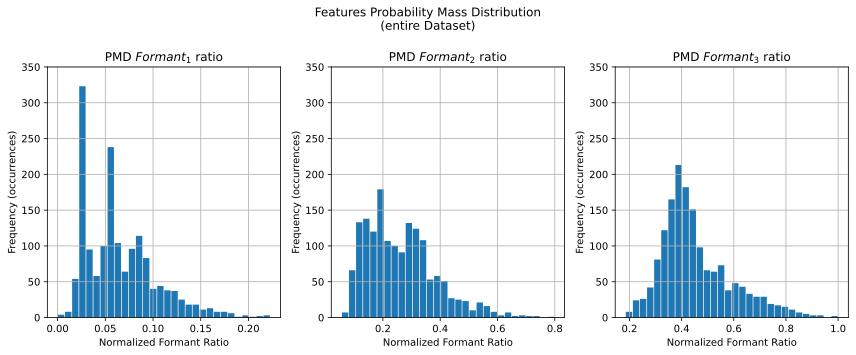

In [ ]:
# Formants Probability Distribution plot
plt.figure(figsize=(12, 5))
plt.suptitle('Features Probability Mass Distribution\n(entire Dataset)')

for i in range(dataset.shape[1] - 1):
    plt.subplot(1, 3, i + 1)
    plt.hist(dataset[:, i + 1], bins=30, rwidth=0.9)
    plt.title(f'PMD $Formant_{i + 1}$ ratio')
    plt.xlabel('Normalized Formant Ratio')
    plt.ylabel('Frequency (occurrences)')
    plt.ylim([0, 350])
    plt.grid()

plt.tight_layout()
plt.savefig("normalized_dataset_stats")
plt.show()

Examinating features data distribution (per class), we evaluate *Z-Scoring* (standardization) usefulness/availability.

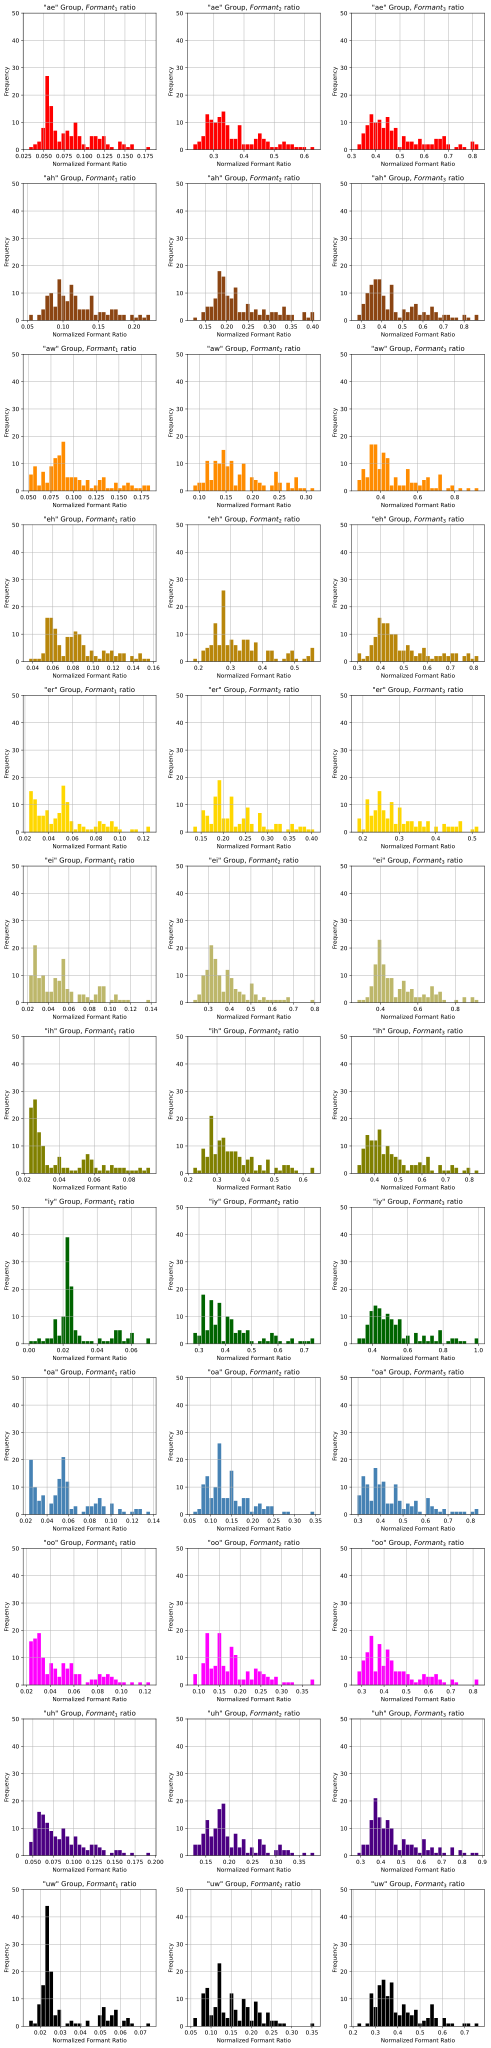

In [ ]:
# Probability distribution (for each feature, in each class)
plt.figure(figsize=(12, 50))

for i in range(len(vowels)):
    vow_group = dataset[end_idx[i]: end_idx[i + 1], :]  # Vowel group Extraction
    for n in range(vow_group.shape[1] - 1):
        plt.subplot(12, 3, (n + 1) + i * 3)
        plt.hist(vow_group[:, n + 1], bins=30, rwidth=0.9, color=colors[i])
        plt.title(f'"{vowels[i]}" Group, $Formant_{n + 1}$ ratio')
        plt.xlabel('Normalized Formant Ratio')
        plt.ylabel('Frequency')
        plt.ylim([0, 50])
        plt.grid()

plt.tight_layout()
plt.savefig('normalized_dataset_stats_(per_class)')
plt.show()

### **OUTPUT** Datasets

**Reference**: [NPZ - NumPy Binary File Compression](https://numpy.org/doc/stable/reference/generated/numpy.savez_compressed.html)

In [ ]:
# HGCW Dataset: 3 Formants (steady state) + Fundamental Normalization + MinMax Scaling
classes_size = np.array(vow_size)  # Phoneme classes sizes array
classes_indices = np.array(end_idx)  # Phoneme classes indices (start/end included)
np.savez_compressed(file='./HGCW_dataset_utils',
                    HGCW_raw = x_data_raw_np,
                    HGCW_fund_norm = x_data_fund_norm,
                    HGCW_minmax = x_data_minmax,
                    HGCW_labels = y_labels_raw_np,
                    classes_size = classes_size,
                    classes_idx = classes_indices)

In [ ]:
# HGCW MEN Dataset: 3 Formants (steady state) + Fundamental Normalization + MinMax Scaling
import numpy as np

# Database (.DAT file) Features Reading (converted to NumPy array)
formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)

# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
speakers = ['m', 'b', 'w', 'g']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Gender Filtering (Male)
male_data, male_indices = speaker_filter(formant_analysis_data, formant_analysis_filenames, speaker = 'm')
male_filenames = formant_analysis_filenames[male_indices]

# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(male_data, male_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

# Outputs initialization
x_data_raw_np = np.zeros((len(nonnull_data), 4), dtype=float)  # Same Database n° of elements, 4 float features (columns)
y_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer label single column array

# Subgroups extraction & analysis
end_idx = [0]  # Indices list initialization (0 and size values comprised)
vow_size = []  # Vowel groups size list initialization

for vowel_idx, vowel in enumerate(vowels):
    vow_data, _ = vowel_filter(nonnull_data, nonnull_filenames, vowel=vowel)  # Vowel sub-set extraction
    end_idx.append(end_idx[vowel_idx] + len(vow_data))  # Actual sub-group End-Index appending
    vow_size.append(len(vow_data))  # Actual sub-group length appending
    print(f'Vowel "{vowel}" sub-set : {len(vow_data)} samples')

    start_idx = end_idx[vowel_idx]  # Previous sub-set end-index
    print('1st  element Idx   :', start_idx)
    stop_idx = end_idx[vowel_idx] + len(vow_data)  # Actual stop index = previous End + actual Size
    print('Last element Idx   :', stop_idx - 1)
    x_data_raw_np[start_idx: stop_idx, :] = vow_data[:, :]   # Output data sub-set ordered writing (Fundamental, 1st, 2nd & 3rd formants only)

    vow_labels = np.full((len(vow_data), 1), vowel_idx, dtype=int)  # Actual integer labels array creation
    print(f'Vowel LABEL        : {vowel} - {vowel_idx}')
    y_labels_raw_np[start_idx: stop_idx, :] = vow_labels  # Output labels sub-set ordered writing

    print('--------------------------------')

# Different labels counter
diff_labels = len(np.unique(y_labels_raw_np))
print()
print(f'--> RAW DATASET shape: {x_data_raw_np.shape}, w. {diff_labels} Labels')
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

# Fundamental Frequency (ratio) Normalization
x_data_fund_norm = np.zeros(x_data_raw_np.shape)  # Output initialization

for i in range(x_data_raw_np.shape[1]):  # For each feature...
    if i >= 1: # For each formant column...
        x_data_fund_norm[:, i] = x_data_raw_np[:, i] / x_data_raw_np[:, 0]  # i-Formant value / i-Fundamental value
    else:  # Exception for Fundamental freq column
        x_data_fund_norm[:, i] = x_data_raw_np[:, i]

print(f"'Fundamental Normalized' Dataset: {x_data_fund_norm.shape[0]} elements (w. {diff_labels} labels) & {x_data_fund_norm.shape[1]} features each")
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

a = 0.  # Lower bound
b = 1.  # Upper bound
x_data_minmax = np.zeros((x_data_fund_norm.shape))
print(f'Fundamental Ratios  STATS:   Min. = {x_data_fund_norm[:, 1:].min()}    Max. = {x_data_fund_norm[:, 1:].max()}')

x_data_minmax[:, 1:] = a + ((x_data_fund_norm[:, 1:] - x_data_fund_norm[:, 1:].min()) / (x_data_fund_norm[:, 1:].max() - x_data_fund_norm[:, 1:].min())) * (b - a)
x_data_minmax[:, 0] = x_data_fund_norm[:, 0]  # Fundamental column exception

print(f'Min-Max Ratios      STATS:   Min. = {x_data_minmax[:, 1:].min()}                   Max. = {x_data_minmax[:, 1:].max()}')
print('--------------------------------------------------------------------')
print(f"'Fundamental & Min-Max Normalized' Dataset: {x_data_minmax.shape[0]} elements (w. {diff_labels} labels) & {x_data_minmax.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Output Store
classes_size = np.array(vow_size)  # Phoneme classes sizes array
classes_indices = np.array(end_idx)  # Phoneme classes indices (start/end included)
np.savez_compressed(file='./HGCW_dataset_utils',
                    HGCW_raw = x_data_raw_np,
                    HGCW_fund_norm = x_data_fund_norm,
                    HGCW_minmax = x_data_minmax,
                    HGCW_labels = y_labels_raw_np,
                    classes_size = classes_size,
                    classes_idx = classes_indices)

Dataset: 1668 samples (for 12 labels) & 4 features each
NON NULL Dataset: 532 samples (for 12 labels) & 4 features each
--------------------------------------------------------------------

Vowel "ae" sub-set : 45 samples
1st  element Idx   : 0
Last element Idx   : 44
Vowel LABEL        : ae - 0
--------------------------------
Vowel "ah" sub-set : 45 samples
1st  element Idx   : 45
Last element Idx   : 89
Vowel LABEL        : ah - 1
--------------------------------
Vowel "aw" sub-set : 45 samples
1st  element Idx   : 90
Last element Idx   : 134
Vowel LABEL        : aw - 2
--------------------------------
Vowel "eh" sub-set : 45 samples
1st  element Idx   : 135
Last element Idx   : 179
Vowel LABEL        : eh - 3
--------------------------------
Vowel "er" sub-set : 40 samples
1st  element Idx   : 180
Last element Idx   : 219
Vowel LABEL        : er - 4
--------------------------------
Vowel "ei" sub-set : 44 samples
1st  element Idx   : 220
Last element Idx   : 263
Vowel LABEL        

In [ ]:
# HGCW WOMEN Dataset: 3 Formants (steady state) + Fundamental Normalization + MinMax Scaling
import numpy as np

# Database (.DAT file) Features Reading (converted to NumPy array)
formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)

# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
speakers = ['m', 'b', 'w', 'g']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Gender Filtering (Male)
male_data, male_indices = speaker_filter(formant_analysis_data, formant_analysis_filenames, speaker = 'w')
male_filenames = formant_analysis_filenames[male_indices]

# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(male_data, male_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

# Outputs initialization
x_data_raw_np = np.zeros((len(nonnull_data), 4), dtype=float)  # Same Database n° of elements, 4 float features (columns)
y_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer label single column array

# Subgroups extraction & analysis
end_idx = [0]  # Indices list initialization (0 and size values comprised)
vow_size = []  # Vowel groups size list initialization

for vowel_idx, vowel in enumerate(vowels):
    vow_data, _ = vowel_filter(nonnull_data, nonnull_filenames, vowel=vowel)  # Vowel sub-set extraction
    end_idx.append(end_idx[vowel_idx] + len(vow_data))  # Actual sub-group End-Index appending
    vow_size.append(len(vow_data))  # Actual sub-group length appending
    print(f'Vowel "{vowel}" sub-set : {len(vow_data)} samples')

    start_idx = end_idx[vowel_idx]  # Previous sub-set end-index
    print('1st  element Idx   :', start_idx)
    stop_idx = end_idx[vowel_idx] + len(vow_data)  # Actual stop index = previous End + actual Size
    print('Last element Idx   :', stop_idx - 1)
    x_data_raw_np[start_idx: stop_idx, :] = vow_data[:, :]   # Output data sub-set ordered writing (Fundamental, 1st, 2nd & 3rd formants only)

    vow_labels = np.full((len(vow_data), 1), vowel_idx, dtype=int)  # Actual integer labels array creation
    print(f'Vowel LABEL        : {vowel} - {vowel_idx}')
    y_labels_raw_np[start_idx: stop_idx, :] = vow_labels  # Output labels sub-set ordered writing

    print('--------------------------------')

# Different labels counter
diff_labels = len(np.unique(y_labels_raw_np))
print()
print(f'--> RAW DATASET shape: {x_data_raw_np.shape}, w. {diff_labels} Labels')
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

# Fundamental Frequency (ratio) Normalization
x_data_fund_norm = np.zeros(x_data_raw_np.shape)  # Output initialization

for i in range(x_data_raw_np.shape[1]):  # For each feature...
    if i >= 1: # For each formant column...
        x_data_fund_norm[:, i] = x_data_raw_np[:, i] / x_data_raw_np[:, 0]  # i-Formant value / i-Fundamental value
    else:  # Exception for Fundamental freq column
        x_data_fund_norm[:, i] = x_data_raw_np[:, i]

print(f"'Fundamental Normalized' Dataset: {x_data_fund_norm.shape[0]} elements (w. {diff_labels} labels) & {x_data_fund_norm.shape[1]} features each")
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

a = 0.  # Lower bound
b = 1.  # Upper bound
x_data_minmax = np.zeros((x_data_fund_norm.shape))
print(f'Fundamental Ratios  STATS:   Min. = {x_data_fund_norm[:, 1:].min()}    Max. = {x_data_fund_norm[:, 1:].max()}')

x_data_minmax[:, 1:] = a + ((x_data_fund_norm[:, 1:] - x_data_fund_norm[:, 1:].min()) / (x_data_fund_norm[:, 1:].max() - x_data_fund_norm[:, 1:].min())) * (b - a)
x_data_minmax[:, 0] = x_data_fund_norm[:, 0]  # Fundamental column exception

print(f'Min-Max Ratios      STATS:   Min. = {x_data_minmax[:, 1:].min()}                   Max. = {x_data_minmax[:, 1:].max()}')
print('--------------------------------------------------------------------')
print(f"'Fundamental & Min-Max Normalized' Dataset: {x_data_minmax.shape[0]} elements (w. {diff_labels} labels) & {x_data_minmax.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Output Store
classes_size = np.array(vow_size)  # Phoneme classes sizes array
classes_indices = np.array(end_idx)  # Phoneme classes indices (start/end included)
np.savez_compressed(file='./HGCW_dataset_utils',
                    HGCW_raw = x_data_raw_np,
                    HGCW_fund_norm = x_data_fund_norm,
                    HGCW_minmax = x_data_minmax,
                    HGCW_labels = y_labels_raw_np,
                    classes_size = classes_size,
                    classes_idx = classes_indices)

Dataset: 1668 samples (for 12 labels) & 4 features each
NON NULL Dataset: 558 samples (for 12 labels) & 4 features each
--------------------------------------------------------------------

Vowel "ae" sub-set : 47 samples
1st  element Idx   : 0
Last element Idx   : 46
Vowel LABEL        : ae - 0
--------------------------------
Vowel "ah" sub-set : 47 samples
1st  element Idx   : 47
Last element Idx   : 93
Vowel LABEL        : ah - 1
--------------------------------
Vowel "aw" sub-set : 47 samples
1st  element Idx   : 94
Last element Idx   : 140
Vowel LABEL        : aw - 2
--------------------------------
Vowel "eh" sub-set : 48 samples
1st  element Idx   : 141
Last element Idx   : 188
Vowel LABEL        : eh - 3
--------------------------------
Vowel "er" sub-set : 40 samples
1st  element Idx   : 189
Last element Idx   : 228
Vowel LABEL        : er - 4
--------------------------------
Vowel "ei" sub-set : 44 samples
1st  element Idx   : 229
Last element Idx   : 272
Vowel LABEL        

In [ ]:
# HGCW Dataset (3 x 4 Formants: 3- steady state, 3 - 10%, 3 - 50%, 3 - 80%) + Transform

# Database (.DAT file) Features Reading (converted to NumPy array)
import numpy as np

formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 27, 28, 29))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)
# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
speakers = ['m', 'b', 'w', 'g']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(formant_analysis_data, formant_analysis_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

# Outputs initialization
x_data_raw_np = np.zeros((len(nonnull_data), 13), dtype=float)  # Same Database n° of elements, fund + 12 formants features (columns)
y_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer label single column array

# Subgroups extraction & analysis
end_idx = [0]  # Indices list initialization (0 and size values comprised)
vow_size = []  # Vowel groups size list initialization

for vowel_idx, vowel in enumerate(vowels):
    vow_data, _ = vowel_filter(nonnull_data, nonnull_filenames, vowel=vowel)  # Vowel sub-set extraction
    end_idx.append(end_idx[vowel_idx] + len(vow_data))  # Actual sub-group End-Index appending
    vow_size.append(len(vow_data))  # Actual sub-group length appending
    print(f'Vowel "{vowel}" sub-set : {len(vow_data)} samples')

    start_idx = end_idx[vowel_idx]  # Previous sub-set end-index
    print('1st  element Idx   :', start_idx)
    stop_idx = end_idx[vowel_idx] + len(vow_data)  # Actual stop index = previous End + actual Size
    print('Last element Idx   :', stop_idx - 1)
    x_data_raw_np[start_idx: stop_idx, :] = vow_data[:, :]   # Output data sub-set ordered writing (Fundamental, 1st, 2nd & 3rd formants only)

    vow_labels = np.full((len(vow_data), 1), vowel_idx, dtype=int)  # Actual integer labels array creation
    print(f'Vowel LABEL        : {vowel} - {vowel_idx}')
    y_labels_raw_np[start_idx: stop_idx, :] = vow_labels  # Output labels sub-set ordered writing

    print('--------------------------------')

# Different labels counter
diff_labels = len(np.unique(y_labels_raw_np))
print()
print(f'--> RAW DATASET shape: {x_data_raw_np.shape}, w. {diff_labels} Labels')
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

# Fundamental Frequency (ratio) Normalization
x_data_fund_norm = np.zeros(x_data_raw_np.shape)  # Output initialization

for i in range(x_data_raw_np.shape[1]):  # For each feature...
    if i >= 1: # For each formant column...
        x_data_fund_norm[:, i] = x_data_raw_np[:, i] / x_data_raw_np[:, 0]  # i-Formant value / i-Fundamental value
    else:  # Exception for Fundamental freq column
        x_data_fund_norm[:, i] = x_data_raw_np[:, i]

print(f"'Fundamental Normalized' Dataset: {x_data_fund_norm.shape[0]} elements (w. {diff_labels} labels) & {x_data_fund_norm.shape[1]} features each")
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

a = 0.  # Lower bound
b = 1.  # Upper bound
x_data_minmax = np.zeros((x_data_fund_norm.shape))
print(f'Fundamental Ratios  STATS:   Min. = {x_data_fund_norm[:, 1:].min()}    Max. = {x_data_fund_norm[:, 1:].max()}')

x_data_minmax[:, 1:] = a + ((x_data_fund_norm[:, 1:] - x_data_fund_norm[:, 1:].min()) / (x_data_fund_norm[:, 1:].max() - x_data_fund_norm[:, 1:].min())) * (b - a)
x_data_minmax[:, 0] = x_data_fund_norm[:, 0]  # Fundamental column exception

print(f'Min-Max Ratios      STATS:   Min. = {x_data_minmax[:, 1:].min()}                   Max. = {x_data_minmax[:, 1:].max()}')
print('--------------------------------------------------------------------')
print(f"'Fundamental & Min-Max Normalized' Dataset: {x_data_minmax.shape[0]} elements (w. {diff_labels} labels) & {x_data_minmax.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Output Store
classes_size = np.array(vow_size)  # Phoneme classes sizes array
classes_indices = np.array(end_idx)  # Phoneme classes indices (start/end included)
np.savez_compressed(file='./HGCW_dataset_utils',
                    HGCW_raw = x_data_raw_np,
                    HGCW_fund_norm = x_data_fund_norm,
                    HGCW_minmax = x_data_minmax,
                    HGCW_labels = y_labels_raw_np,
                    classes_size = classes_size,
                    classes_idx = classes_indices)

NON NULL Dataset: 1597 samples (for 12 labels) & 13 features each
--------------------------------------------------------------------

Vowel "ae" sub-set : 134 samples
1st  element Idx   : 0
Last element Idx   : 133
Vowel LABEL        : ae - 0
--------------------------------
Vowel "ah" sub-set : 135 samples
1st  element Idx   : 134
Last element Idx   : 268
Vowel LABEL        : ah - 1
--------------------------------
Vowel "aw" sub-set : 133 samples
1st  element Idx   : 269
Last element Idx   : 401
Vowel LABEL        : aw - 2
--------------------------------
Vowel "eh" sub-set : 139 samples
1st  element Idx   : 402
Last element Idx   : 540
Vowel LABEL        : eh - 3
--------------------------------
Vowel "er" sub-set : 118 samples
1st  element Idx   : 541
Last element Idx   : 658
Vowel LABEL        : er - 4
--------------------------------
Vowel "ei" sub-set : 126 samples
1st  element Idx   : 659
Last element Idx   : 784
Vowel LABEL        : ei - 5
--------------------------------
Vo

In [ ]:
# HGCW Dataset (3 x 4 Formants: 3- steady state, 3 - 10%, 3 - 50%, 3 - 80%) + SPEAKER Label

# Database (.DAT file) Features Reading (converted to NumPy array)
import numpy as np

formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 27, 28, 29))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)
# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
speakers = ['b', 'g', 'm', 'w']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(formant_analysis_data, formant_analysis_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

# Outputs initialization
x_data_raw_np = np.zeros((len(nonnull_data), 13), dtype=float)  # Same Database n° of elements, fund + 12 formants features (columns)
y_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer phoneme labels single column array
z_labels_raw_np = np.zeros((len(nonnull_data), 1), dtype=int)  # Same Database n° of elements, integer speaker labels single column array

# Subgroups extraction & analysis
end_idx = [0]  # Indices list initialization (0 value comprised)
vow_size = []  # Vowel groups size list initialization
spk_coords = []  # Will be a list of 12 lists: each sub-list will contain 4 speaker tuples (start_idx, speaker-phoneme size)


for vowel_idx, vowel in enumerate(vowels):
    vow_data, vow_indices = vowel_filter(nonnull_data, nonnull_filenames, vowel=vowel)  # Vowel sub-set extraction
    end_idx.append(end_idx[vowel_idx] + len(vow_data))  # Actual sub-group End-Index appending
    vow_size.append(len(vow_data))  # Actual sub-group length appending
    print(f'Vowel "{vowel}" sub-set : {len(vow_data)} samples')

    start_idx = end_idx[vowel_idx]  # Previous sub-set end-index
    print('1st  element Idx   :', start_idx)
    stop_idx = end_idx[vowel_idx] + len(vow_data)  # Actual stop index = previous End + actual Size
    print('Last element Idx   :', stop_idx - 1)
    x_data_raw_np[start_idx: stop_idx, :] = vow_data[:, :]   # Output data sub-set ordered writing (Fundamental, 1st, 2nd & 3rd formants only)

    vow_labels = np.full((len(vow_data), 1), vowel_idx, dtype=int)  # Actual integer labels array creation
    print(f'Vowel LABEL        : {vowel} - {vowel_idx}')
    y_labels_raw_np[start_idx: stop_idx, :] = vow_labels  # Output labels sub-set ordered writing
    print()
    # -------------------------------------------------------------------------------------------

    # Subset speaker snalysis
    vow_data_spk = np.zeros((len(vow_data), 1), dtype=int)
    vow_data_idx = []

    for speaker_idx, speaker in enumerate(speakers):
        _, spk_indices = speaker_filter(vow_data, nonnull_filenames[vow_indices], speaker=speaker)  # Extract n-speaker indices from vowel filtered subset
        vow_data_idx.append((spk_indices[0], len(spk_indices)))
        vow_data_spk[spk_indices] = speaker_idx  # Set actual speaker label to actual vowel-speaker array
        print(f'"{speaker.upper()}"-speakers       : {len(spk_indices)} (w. label "{speaker_idx}")')

    z_labels_raw_np[start_idx: stop_idx, :] = vow_data_spk  # Append vowel-speaker to Output Speakers label
    spk_coords.append(vow_data_idx)
    print('--------------------------------')
    # -------------------------------------------------------------------------------------------

# Different labels counter
diff_phoneme_labels = len(np.unique(y_labels_raw_np))
diff_speaker_labels = len(np.unique(z_labels_raw_np))
print()
print(f'--> RAW DATASET shape: {x_data_raw_np.shape}, w. {diff_phoneme_labels} PHONEME Labels & {diff_speaker_labels} SPEAKER Labels')
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

# Fundamental Frequency (ratio) Normalization
x_data_fund_norm = np.zeros(x_data_raw_np.shape)  # Output initialization

for i in range(x_data_raw_np.shape[1]):  # For each feature...
    if i >= 1: # For each formant column...
        x_data_fund_norm[:, i] = x_data_raw_np[:, i] / x_data_raw_np[:, 0]  # i-Formant value / i-Fundamental value
    else:  # Exception for Fundamental freq column
        x_data_fund_norm[:, i] = x_data_raw_np[:, i]

print(f"'Fundamental Normalized' Dataset: {x_data_fund_norm.shape[0]} elements & {x_data_fund_norm.shape[1]} features each")
print('----------------------------------------------------------------')
# ------------------------------------------------------------------------------------------------------------

a = 0.  # Lower bound
b = 1.  # Upper bound
x_data_minmax = np.zeros((x_data_fund_norm.shape))
print(f'Fundamental Ratios  STATS:   Min. = {x_data_fund_norm[:, 1:].min()}    Max. = {x_data_fund_norm[:, 1:].max()}')

x_data_minmax[:, 1:] = a + ((x_data_fund_norm[:, 1:] - x_data_fund_norm[:, 1:].min()) / (x_data_fund_norm[:, 1:].max() - x_data_fund_norm[:, 1:].min())) * (b - a)
x_data_minmax[:, 0] = x_data_fund_norm[:, 0]  # Fundamental column exception

print(f'Min-Max Ratios      STATS:   Min. = {x_data_minmax[:, 1:].min()}                   Max. = {x_data_minmax[:, 1:].max()}')
print('--------------------------------------------------------------------')
print(f"'Fundamental & Min-Max Normalized' Dataset: {x_data_minmax.shape[0]} elements & {x_data_minmax.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Output Store
phon_classes_size = np.array(vow_size)  # Phoneme classes sizes array
phon_classes_indices = np.array(end_idx)  # Phoneme classes indices (start/end included)
phoneme_speaker_coordinates = np.array(spk_coords) # Each couple is (vow_spk sub-group start idx, vow-spk sub-group size)
np.savez_compressed(file='./HGCW_dataset_utils',
                    HGCW_raw = x_data_raw_np,
                    HGCW_fund_norm = x_data_fund_norm,
                    HGCW_minmax = x_data_minmax,
                    HGCW_phon_labels = y_labels_raw_np,
                    HGCW_spk_labels = z_labels_raw_np,
                    phon_size = phon_classes_size,
                    phon_idx = phon_classes_indices,
                    phon_spk_coords = phoneme_speaker_coordinates)

Dataset: 1668 samples (for 12 labels) & 13 features each
NON NULL Dataset: 1597 samples (for 12 labels) & 13 features each
--------------------------------------------------------------------

Vowel "ae" sub-set : 134 samples
1st  element Idx   : 0
Last element Idx   : 133
Vowel LABEL        : ae - 0

"B"-speakers       : 25 (w. label "0")
"G"-speakers       : 17 (w. label "1")
"M"-speakers       : 45 (w. label "2")
"W"-speakers       : 47 (w. label "3")
--------------------------------
Vowel "ah" sub-set : 135 samples
1st  element Idx   : 134
Last element Idx   : 268
Vowel LABEL        : ah - 1

"B"-speakers       : 24 (w. label "0")
"G"-speakers       : 19 (w. label "1")
"M"-speakers       : 45 (w. label "2")
"W"-speakers       : 47 (w. label "3")
--------------------------------
Vowel "aw" sub-set : 133 samples
1st  element Idx   : 269
Last element Idx   : 401
Vowel LABEL        : aw - 2

"B"-speakers       : 24 (w. label "0")
"G"-speakers       : 18 (w. label "1")
"M"-speakers     

In [ ]:
# HGCW Dataset (3 x 4 Formants: 3- steady state, 3 - 10%, 3 - 50%, 3 - 80%) + SPEAKER Label

# Database (.DAT file) Features Reading (converted to NumPy array)
import numpy as np

formant_analysis_data = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=(2, 3, 4, 5, 6, 7, 8, 18, 19, 20, 27, 28, 29))
formant_analysis_filenames = np.loadtxt("./HGCW_LPC_formants_fine.dat", usecols=0, dtype=str)
# Useful Parameters
vowels = ['ae', 'ah', 'aw', 'eh', 'er', 'ei', 'ih', 'iy', 'oa', 'oo', 'uh', 'uw']  # Vowels list
speakers = ['b', 'g', 'm', 'w']  # Speakers list
print(f"Dataset: {formant_analysis_data.shape[0]} samples (for {len(vowels)} labels) & {formant_analysis_data.shape[1]} features each")
# ------------------------------------------------------------------------------------------------------------

# Remove Null elements
nonnull_data, nonnull_filenames, _ = null_filter(formant_analysis_data, formant_analysis_filenames)
print(f"NON NULL Dataset: {nonnull_data.shape[0]} samples (for {len(vowels)} labels) & {nonnull_data.shape[1]} features each")
print('--------------------------------------------------------------------')
print()

## **Future Works**

- Extract an HGCW output with formant tracks only (No Steady States): test the minimum amount of time-points required for a correct evaluation;

- Repeat Analysis & feature extraction on:
    
    - PB Dataset
    - TIMIT Dataset
    - Bernard Dataset (Australian English)
    - VTRFormants Dataset
    - IRCAM VocalSet